In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Internetusage_Beginnertask03.csv to Internetusage_Beginnertask03.csv


In [3]:
df=pd.read_csv('Internetusage_Beginnertask03.csv')

In [4]:
df.head()

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10 21:20:44,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11 00:37:42,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout
4,user1,2022-05-11 02:59:38,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout


In [5]:
df.shape

(4712, 9)

In [6]:
df.columns

Index(['name', 'start_time', 'usage_time', 'IP', 'MAC', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   4712 non-null   object 
 1   start_time             4712 non-null   object 
 2   usage_time             4712 non-null   object 
 3   IP                     4712 non-null   object 
 4   MAC                    4712 non-null   object 
 5   upload                 4712 non-null   object 
 6   download               4712 non-null   object 
 7   total_transfer         4712 non-null   float64
 8   seession_break_reason  4703 non-null   object 
dtypes: float64(1), object(8)
memory usage: 331.4+ KB


In [8]:
df=df.iloc[:, [1,2,5,6,7,8]].copy()

In [9]:
df.head()

,start_time,usage_time,upload,download,total_transfer,seession_break_reason
0,2022-05-10 02:59:32,00:00:36:28,15861.76,333168.64,349030.40,Idle-Timeout
1,2022-05-10 18:53:27,00:01:49:56,16957.44,212152.32,229109.76,Idle-Timeout
2,2022-05-10 21:20:44,00:01:35:00,14080.0,195153.92,209233.92,Idle-Timeout
3,2022-05-11 00:37:42,00:00:26:00,5242.88,40806.4,46049.28,Idle-Timeout
4,2022-05-11 02:59:38,00:00:11:52,22067.2,10772.48,32839.68,Idle-Timeout


In [10]:
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')

In [11]:
df[['start_time']].head()

,start_time
0,2022-05-10 02:59:32
1,2022-05-10 18:53:27
2,2022-05-10 21:20:44
3,2022-05-11 00:37:42
4,2022-05-11 02:59:38


In [12]:
df['hour']=df['start_time'].dt.hour

In [13]:
df[['start_time', 'hour']].head()

,start_time,hour
0,2022-05-10 02:59:32,2
1,2022-05-10 18:53:27,18
2,2022-05-10 21:20:44,21
3,2022-05-11 00:37:42,0
4,2022-05-11 02:59:38,2


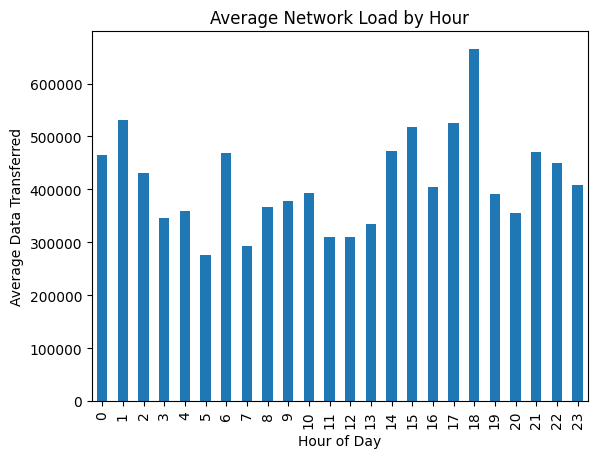

In [14]:
hourly_load = df.groupby('hour')['total_transfer'].mean()

plt.figure()
hourly_load.plot(kind='bar')
plt.title("Average Network Load by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Data Transferred")
plt.show()

In [15]:
df['heavy_user'] = df['total_transfer'] > df['total_transfer'].quantile(0.90)

df.groupby('heavy_user')['total_transfer'].describe()

,count,mean,std,min,25%,50%,75%,max
heavy_user,,,,,,,,
False,4240.0,2.500817e+05,2.422243e+05,1.12,51968.00,168012.8,388131.84,977838.08
True,472.0,2.049953e+06,2.541328e+06,978268.16,1150812.16,1415577.6,2031616.00,28552724.48


<Figure size 640x480 with 0 Axes>

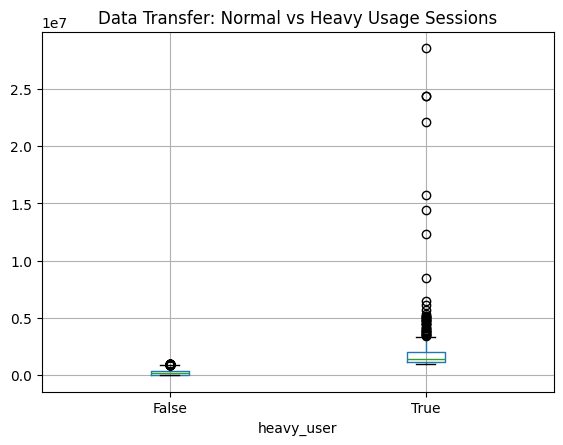

In [16]:
plt.figure()
df.boxplot(column='total_transfer', by='heavy_user')
plt.title("Data Transfer: Normal vs Heavy Usage Sessions")
plt.suptitle("")
plt.show()

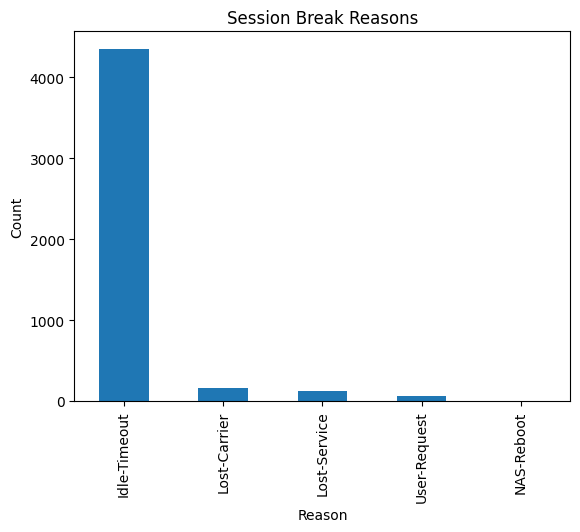

In [17]:
df['seession_break_reason'].value_counts().plot(kind='bar')
plt.title("Session Break Reasons")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.show()

In [18]:
df['late_night']=df['hour'].apply(lambda x: 1 if x in [0,1,2,3] else 0)

In [19]:
df[['start_time', 'hour', 'late_night']].head()

,start_time,hour,late_night
0,2022-05-10 02:59:32,2,1
1,2022-05-10 18:53:27,18,0
2,2022-05-10 21:20:44,21,0
3,2022-05-11 00:37:42,0,1
4,2022-05-11 02:59:38,2,1


In [20]:
df['usage_time_str'] = df['usage_time'].astype(str)
df['usage_time_str'].head()

,usage_time_str
0,00:00:36:28
1,00:01:49:56
2,00:01:35:00
3,00:00:26:00
4,00:00:11:52


In [21]:
time_parts = df['usage_time_str'].str.split(':', expand=True)
time_parts.columns = ['days', 'hours', 'minutes', 'seconds']
time_parts = time_parts.apply(pd.to_numeric, errors='coerce')

In [22]:
df['usage_seconds'] = (
    time_parts['days'] * 24 * 3600 +
    time_parts['hours'] * 3600 +
    time_parts['minutes'] * 60 +
    time_parts['seconds']
)

In [23]:
df[['usage_time', 'usage_seconds']].head()

,usage_time,usage_seconds
0,00:00:36:28,2188
1,00:01:49:56,6596
2,00:01:35:00,5700
3,00:00:26:00,1560
4,00:00:11:52,712


In [24]:
df.groupby('late_night')['usage_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
late_night,,,,,,,,
0,4142.0,7864.264124,9213.383384,1.0,1934.50,4825.5,10251.50,87667.0
1,570.0,7530.292982,9239.224588,28.0,1696.75,4323.0,9298.25,70511.0


<Figure size 640x480 with 0 Axes>

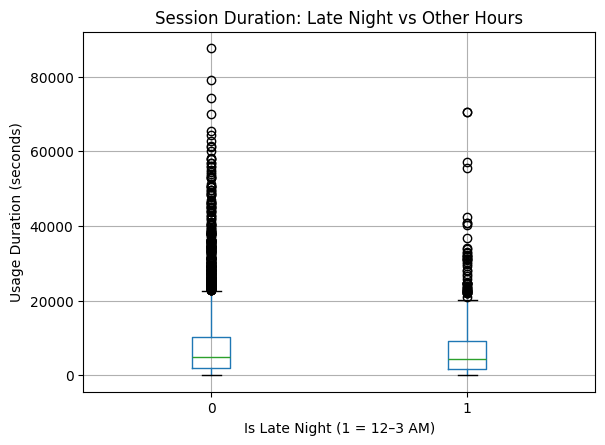

In [25]:
plt.figure()
df.boxplot(column='usage_seconds', by='late_night')
plt.title("Session Duration: Late Night vs Other Hours")
plt.suptitle("")
plt.xlabel("Is Late Night (1 = 12–3 AM)")
plt.ylabel("Usage Duration (seconds)")
plt.show()

In [26]:
df['data_per_second']=df['total_transfer']/df['usage_seconds']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['data_per_second'], inplace=True)

In [27]:
df.groupby('late_night')['data_per_second'].describe()

,count,mean,std,min,25%,50%,75%,max
late_night,,,,,,,,
0,4142.0,69.321773,117.847011,0.102919,20.423579,41.556850,77.696913,2428.499592
1,570.0,84.194998,112.744133,0.172245,24.119895,48.640463,99.636230,939.828475


<Figure size 640x480 with 0 Axes>

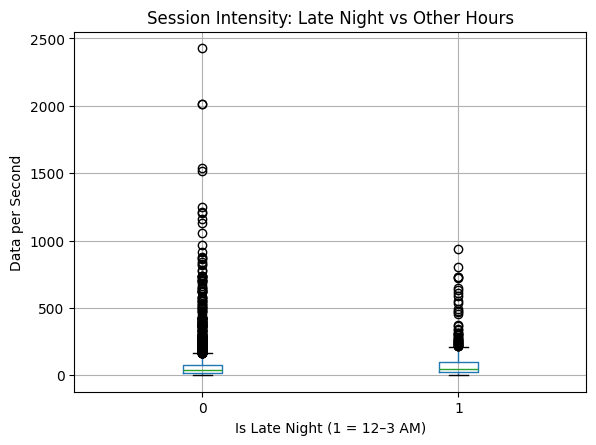

In [28]:
plt.figure()
df.boxplot(column='data_per_second', by='late_night')
plt.title("Session Intensity: Late Night vs Other Hours")
plt.suptitle("")
plt.xlabel("Is Late Night (1 = 12–3 AM)")
plt.ylabel("Data per Second")
plt.show()

In [29]:
df['time_weight'] = df['late_night'].apply(lambda x: 1.5 if x == 1 else 1.0)
df['wifi_stress'] = df['data_per_second'] * df['time_weight']

In [30]:
df[['data_per_second', 'late_night', 'time_weight', 'wifi_stress']].head()

,data_per_second,late_night,time_weight,wifi_stress
0,159.520293,1,1.5,239.280439
1,34.734651,0,1.0,34.734651
2,36.707705,0,1.0,36.707705
3,29.518769,1,1.5,44.278154
4,46.123146,1,1.5,69.184719


In [31]:
def convert_to_mb(value):
    if isinstance(value, str):
        value = value.strip().upper()
        if value.endswith('GB'):
            return float(value[:-2]) * 1024
        elif value.endswith('MB'):
            return float(value[:-2])
        elif value.endswith('KB'):
            return float(value[:-2]) / 1024
        elif value.endswith('B'):
            return float(value[:-1]) / (1024 * 1024)
    return value

In [32]:
df['upload_mb'] = df['upload'].apply(convert_to_mb)
df['download_mb'] = df['download'].apply(convert_to_mb)

In [33]:
df[['upload', 'upload_mb', 'download', 'download_mb']].head()

,upload,upload_mb,download,download_mb
0,15861.76,15861.76,333168.64,333168.64
1,16957.44,16957.44,212152.32,212152.32
2,14080.0,14080.0,195153.92,195153.92
3,5242.88,5242.88,40806.4,40806.4
4,22067.2,22067.2,10772.48,10772.48


In [34]:
features = [
    'hour',
    'late_night',
    'usage_seconds',
    'upload_mb',
    'download_mb',
    'total_transfer'
]

X = df[features]
y = df['wifi_stress']

In [35]:
X = X.fillna(0)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

MAE: 49.2900761284166
R2: 0.2184105774548577


In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [39]:
y_pred_rf = rf.predict(X_test)

print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RF R2:", r2_score(y_test, y_pred_rf))

RF MAE: 7.1866009384758245
RF R2: 0.9170093916325097


In [40]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance

,feature,importance
2,usage_seconds,0.499804
5,total_transfer,0.290084
4,download_mb,0.147316
3,upload_mb,0.039603
0,hour,0.018391
1,late_night,0.004803


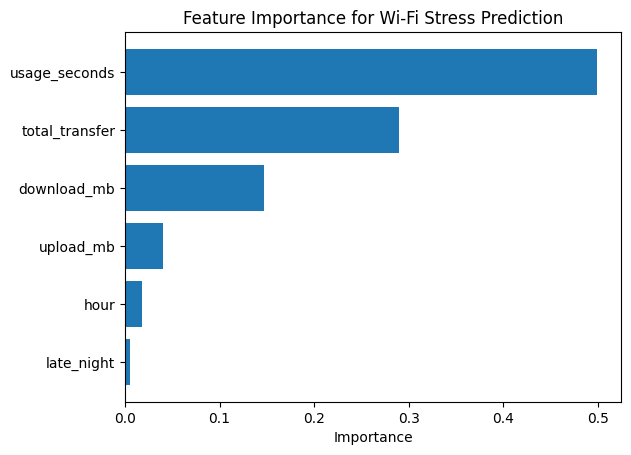

In [41]:
plt.figure()
plt.barh(
    feature_importance['feature'],
    feature_importance['importance']
)
plt.xlabel("Importance")
plt.title("Feature Importance for Wi-Fi Stress Prediction")
plt.gca().invert_yaxis()
plt.show()

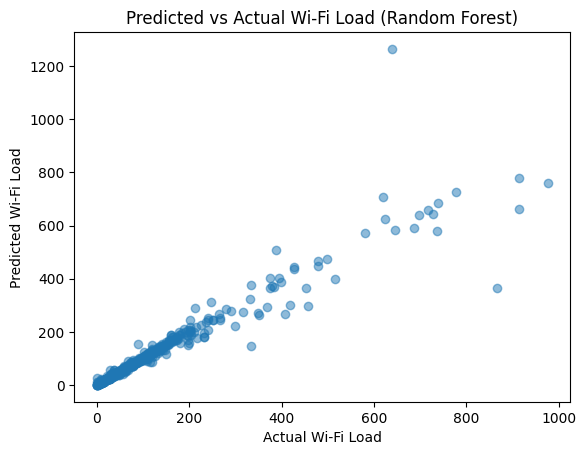

In [42]:
plt.figure()
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Wi-Fi Load")
plt.ylabel("Predicted Wi-Fi Load")
plt.title("Predicted vs Actual Wi-Fi Load (Random Forest)")
plt.show()

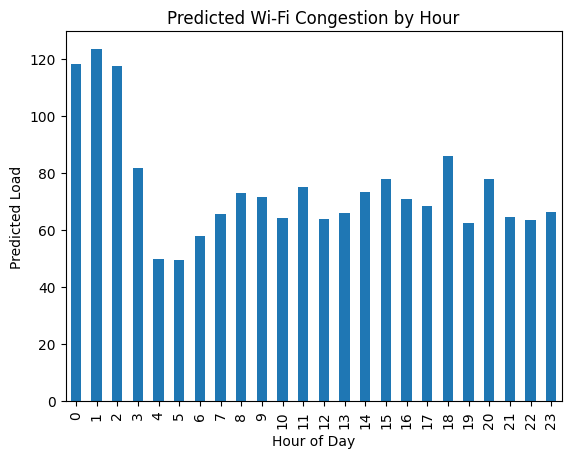

In [43]:
df['predicted_load'] = rf.predict(X)

hourly_pred = df.groupby('hour')['predicted_load'].mean()

plt.figure()
hourly_pred.plot(kind='bar')
plt.title("Predicted Wi-Fi Congestion by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Load")
plt.show()

In [44]:
best_hours = hourly_pred.sort_values().head(3)
best_hours

,predicted_load
hour,
5,49.548042
4,49.669720
6,57.928281
